# Analysis of 4 decades of movies data. 
Dataset from Kaggle (https://www.kaggle.com/danielgrijalvas/movies), downloaded on 9 November 2021.

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io

import matplotlib
import matplotlib.pyplot as plt
sns.set()
from matplotlib.pyplot import figure

from datetime import date
! pip install cpi
import cpi
#cpi.update()

#Remove setting with copy warning
pd.options.mode.chained_assignment = None  # default='warn'

In [140]:
#Read file
url = "https://raw.githubusercontent.com/JacintaKnight/Movies-1980-2020/main/movies.csv" 
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [141]:
print('Number of rows:', len(df))
print('Number of unique companies:', df['company'].nunique())
print('Number of unique movie names:', df['name'].nunique())
df.head(50)

Number of rows: 7668
Number of unique companies: 2385
Number of unique movie names: 7512


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [142]:
#checking for duplicate rows. 
df[df.duplicated(subset = ['name', 'year'], keep=False) == True].count()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [143]:
#calculate no. blank cells per column
print('Number of blank cells per column\n', df.isnull().sum())

#calculate proportion blank cells per column wihtout loop
missing = df.isnull().sum() / len(df.index)
print('Proportion missing per column\n', missing)

Number of blank cells per column
 name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
Proportion missing per column
 name        0.000000
rating      0.010042
genre       0.000000
year        0.000000
released    0.000261
score       0.000391
votes       0.000391
director    0.000000
writer      0.000391
star        0.000130
country     0.000391
budget      0.283125
gross       0.024648
company     0.002217
runtime     0.000522
dtype: float64


I have added columns to the dataframe adjusting gross and budget for inflation so that I can compate the inflation-adjusted amounts later.

In [144]:
#Adjust budget and gross for inflation

def adjbudget (row):
    if row['year'] >= 2019:
        val = row['budget']
    else:
        val = cpi.inflate(row["budget"], row["year"])
    return val

df['budget_adjusted'] = df.apply(adjbudget, axis=1)

def adjgross (row):
    if row['year'] >= 2019:
        val = row['gross']
    else:
        val = cpi.inflate(row["gross"], row["year"])
    return val

df['gross_adjusted'] = df.apply(adjgross, axis=1)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_adjusted,gross_adjusted
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,5.790089e+07,1.432248e+08
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1.371337e+07,1.793498e+08
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,5.485347e+07,1.640652e+09
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1.066595e+07,2.543176e+08
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1.828449e+07,1.214283e+08


Over 28% of rows have missing data in the budget column, and 2.4% have missing data in the gross column (there is some overlap between these). Because this is a large proportion of the data, I don't want to remove all of the rows with missing data from the dataframe. Instead I have replaced these values with 0 so that I can analyse the data that is available in these rows. I have then removed any rows with missing data in other columns as these represent a very small portion of the dataset.

Before replacing the missing data I also created a copy of the dataframe removing the rows with missing data. This copy will enable me to calculate revenue per $ spent later in the analysis, ignoring all rows that are missing one or both of these values.

In [145]:
#Create a copy of the dataframe removing NaNs
df1 = df.dropna(how='any',axis=0) 

In [146]:
#Filling NaNs in  budget and gross in original dataframe with 0
df[['budget', 'gross']] = df[['budget', 'gross']].fillna(0)

#Drop other NaNs in dataframe as these represent a very small portion of the data
df = df.dropna(how='any',axis=0) 

I would like to analyse the number of movies for each director/star to see if this is correlated with the gross revenue. To enable this analysis, I added columns to the dataframe with the count of movies for each director/star.

In [147]:
#add count of movies for directors to dataframe
directors_count = df['director'].value_counts()
directors_count  = directors_count.reset_index()
directors_count = directors_count.rename(columns = {'director':'dir_count'})
directors_count = directors_count.rename(columns = {'index':'director'})
df = pd.merge(df, directors_count, on='director', how = 'left')

#add count of movies for stars to the dataframe
stars_count = df['star'].value_counts()
stars_count  = stars_count.reset_index()
stars_count = stars_count.rename(columns = {'star':'star_count'})
stars_count = stars_count.rename(columns = {'index':'star'})
df = pd.merge(df, stars_count, on='star', how = 'left')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_adjusted,gross_adjusted,dir_count,star_count
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,5.790089e+07,1.432248e+08,2,18
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1.371337e+07,1.793498e+08,4,4
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,5.485347e+07,1.640652e+09,3,2
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1.066595e+07,2.543176e+08,6,3
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1.828449e+07,1.214283e+08,9,16


As expected, both the gross revenue and budget data are very right-skewed. 

The mean budget and gross revenue have increased significantly over time, both in real and nominal dollars. 

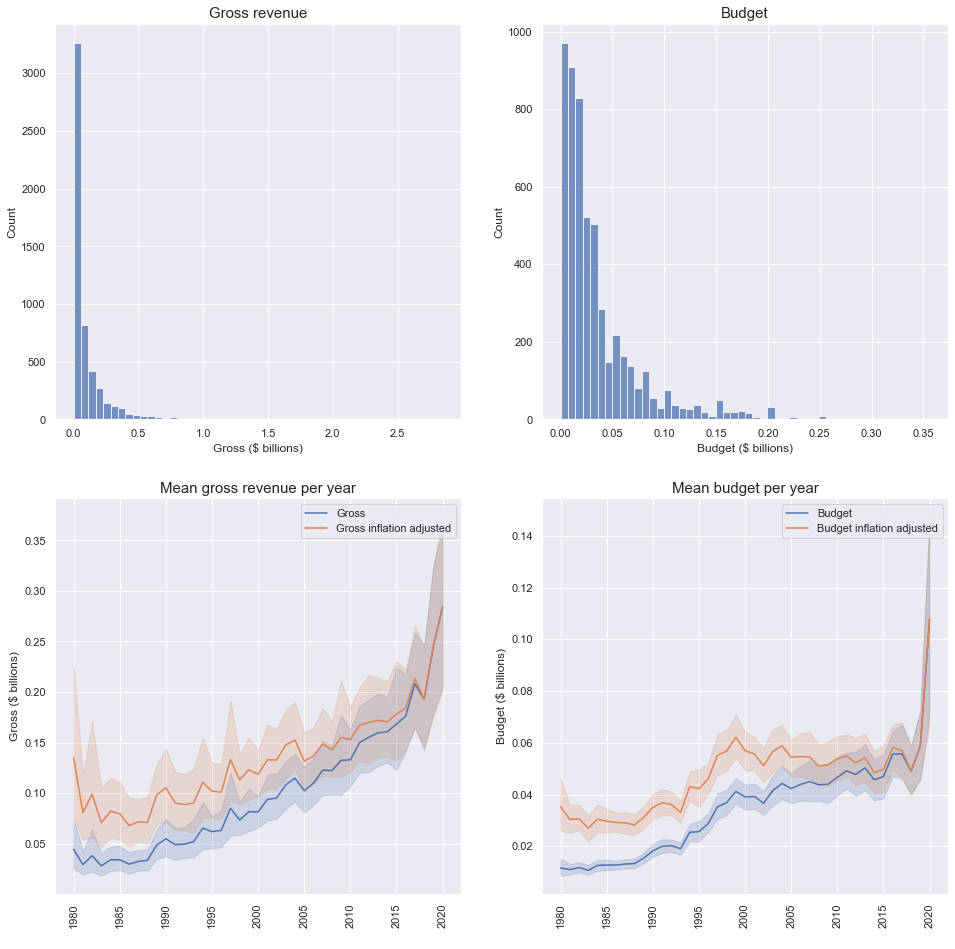

In [162]:
#histogram of gross revenue
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16,16))
plt.subplots_adjust( wspace = 0.2, hspace = 0.2)   #adjust space between plots

sns.histplot(ax=axes[0, 0], x=df1['gross']/1000000000, bins=50)
axes[0, 0].set_title('Gross revenue', fontsize=15)
axes[0, 0].set_xlabel('Gross ($ billions)')

sns.histplot(ax=axes[0, 1], x=df1['budget']/1000000000, bins=50)
axes[0, 1].set_title('Budget', fontsize=15)
axes[0, 1].set_xlabel('Budget ($ billions)')

sns.lineplot(ax=axes[1, 0], x=df1['year'], y=df1['gross']/1000000000)
sns.lineplot(ax=axes[1, 0], x=df1['year'], y=df1['gross_adjusted']/1000000000)
axes[1, 0].set_title('Mean gross revenue per year', fontsize=15)
axes[1, 0].set_ylabel('Gross ($ billions)')
axes[1, 0].set_xlabel(' ')
axes[1, 0].legend(labels=["Gross","Gross inflation adjusted"])
axes[1, 0].tick_params(axis='x', rotation=90)

sns.lineplot(ax=axes[1, 1], x=df1['year'], y=df1['budget']/1000000000)
sns.lineplot(ax=axes[1, 1], x=df1['year'], y=df1['budget_adjusted']/1000000000)
axes[1, 1].set_title('Mean budget per year', fontsize=15)
axes[1, 1].set_ylabel('Budget ($ billions)')
axes[1, 1].set_xlabel(' ')
axes[1, 1].legend(labels=["Budget","Budget inflation adjusted"])
axes[1, 1].tick_params(axis='x', rotation=90)

plt.show()

I added a column to df1 of gross divided by budget to enable analysis of the gross revenue per dollar spent.

The gross revenue per dollar spent is highly skewed to the right, as shown in the boxplots below. The mean gross revenue per dollar of budget is \\$6.73 whereas the median is \\$1.84. 

There are many outliers, the largest is Paranormal Activity which has  \\$12890 gross revenue per dollar of budget, and the second largest outlier is the Blair Witch Porject with \\$4144 gross revenue per dollar of budget.

In [163]:
#Add column to df1 with gross earnings per dollar budget.
df1['earnings_per_$'] = df1['gross'] / df1['budget']

#Calculate mean and median
print('Earnings per $ spent (mean):', df1['earnings_per_$'].mean())
print('Earnings per $ spent (median):', df1['earnings_per_$'].median())

df1.sort_values(by=['earnings_per_$'], ascending=False)

Earnings per $ spent (mean): 6.726742596192021
Earnings per $ spent (median): 1.8363530625


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_adjusted,gross_adjusted,earnings_per_$
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000.0,193355800.0,Solana Films,86.0,1.816615e+04,2.341686e+08,12890.386667
3459,The Blair Witch Project,R,Horror,1999,"July 30, 1999 (United States)",6.5,239000.0,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000.0,248639099.0,Haxan Films,81.0,9.043469e+04,3.747600e+08,4143.984983
6815,The Gallows,R,Horror,2015,"July 10, 2015 (United States)",4.3,20000.0,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000.0,42964410.0,New Line Cinema,81.0,1.059447e+05,4.551852e+07,429.644100
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000.0,2040920.0,Columbia Pictures,81.0,1.252850e+04,3.652810e+06,291.560000
5154,Once,R,Drama,2007,"June 15, 2007 (United States)",7.8,112000.0,John Carney,John Carney,Glen Hansard,Ireland,150000.0,20936722.0,Bórd Scannán na hÉireann,86.0,1.816615e+05,2.535597e+07,139.578147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Savior,R,Drama,1998,"November 20, 1998 (United States)",7.3,11000.0,Predrag Antonijevic,Robert Orr,Dennis Quaid,United States,10000000.0,14328.0,Initial Entertainment Group (IEG),103.0,1.540534e+07,2.207277e+04,0.001433
1898,The Lovers on the Bridge,R,Drama,1991,"July 2, 1999 (United States)",7.6,13000.0,Leos Carax,Leos Carax,Juliette Binoche,France,28000000.0,29679.0,Films A2,125.0,5.162258e+07,5.471810e+04,0.001060
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2970.0,Trimark Pictures,97.0,8.688824e+06,5.161161e+03,0.000594
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2554.0,Copperheart Entertainment,108.0,7.291144e+06,3.724316e+03,0.000511


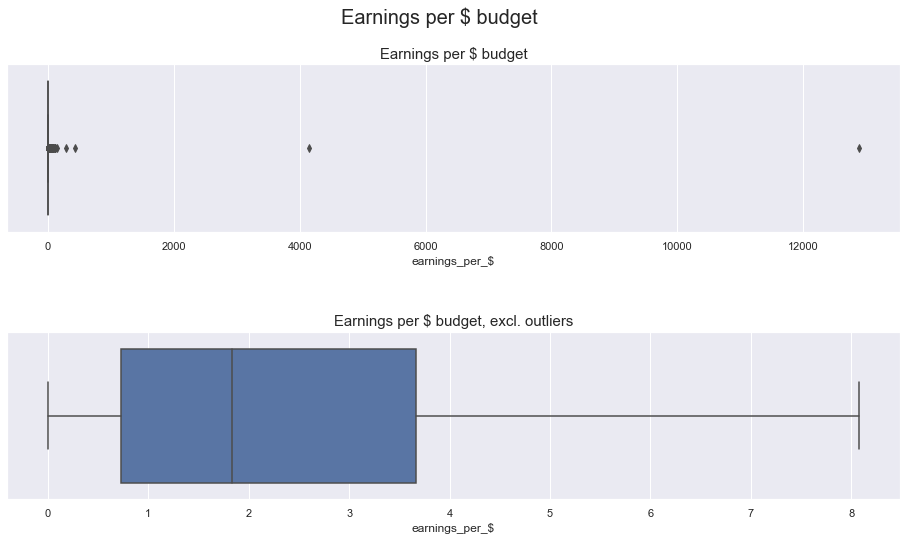

In [164]:
#Box plot earnings per $ budget

fig, axes = plt.subplots(2, 1, sharex=False, figsize=(16,8))
fig.suptitle('Earnings per $ budget', fontsize=20)
plt.subplots_adjust( wspace = 0.2, hspace = 0.6)   #adjust space between plots

sns.boxplot(ax=axes[0], x=df1['earnings_per_$'])
axes[0].set_title('Earnings per $ budget', fontsize=15)

sns.boxplot(ax=axes[1], x=df1['earnings_per_$'], showfliers = False)
axes[1].set_title('Earnings per $ budget, excl. outliers', fontsize=15)

#sns.boxplot(ax=axes[1], x=df1['earnings_per_$'].loc[df1['earnings_per_$']<100])
#axes[1].set_title('Earnings per $ budget, excl. outliers over $100', fontsize=15)

plt.show()


## Exploratory analysis by director


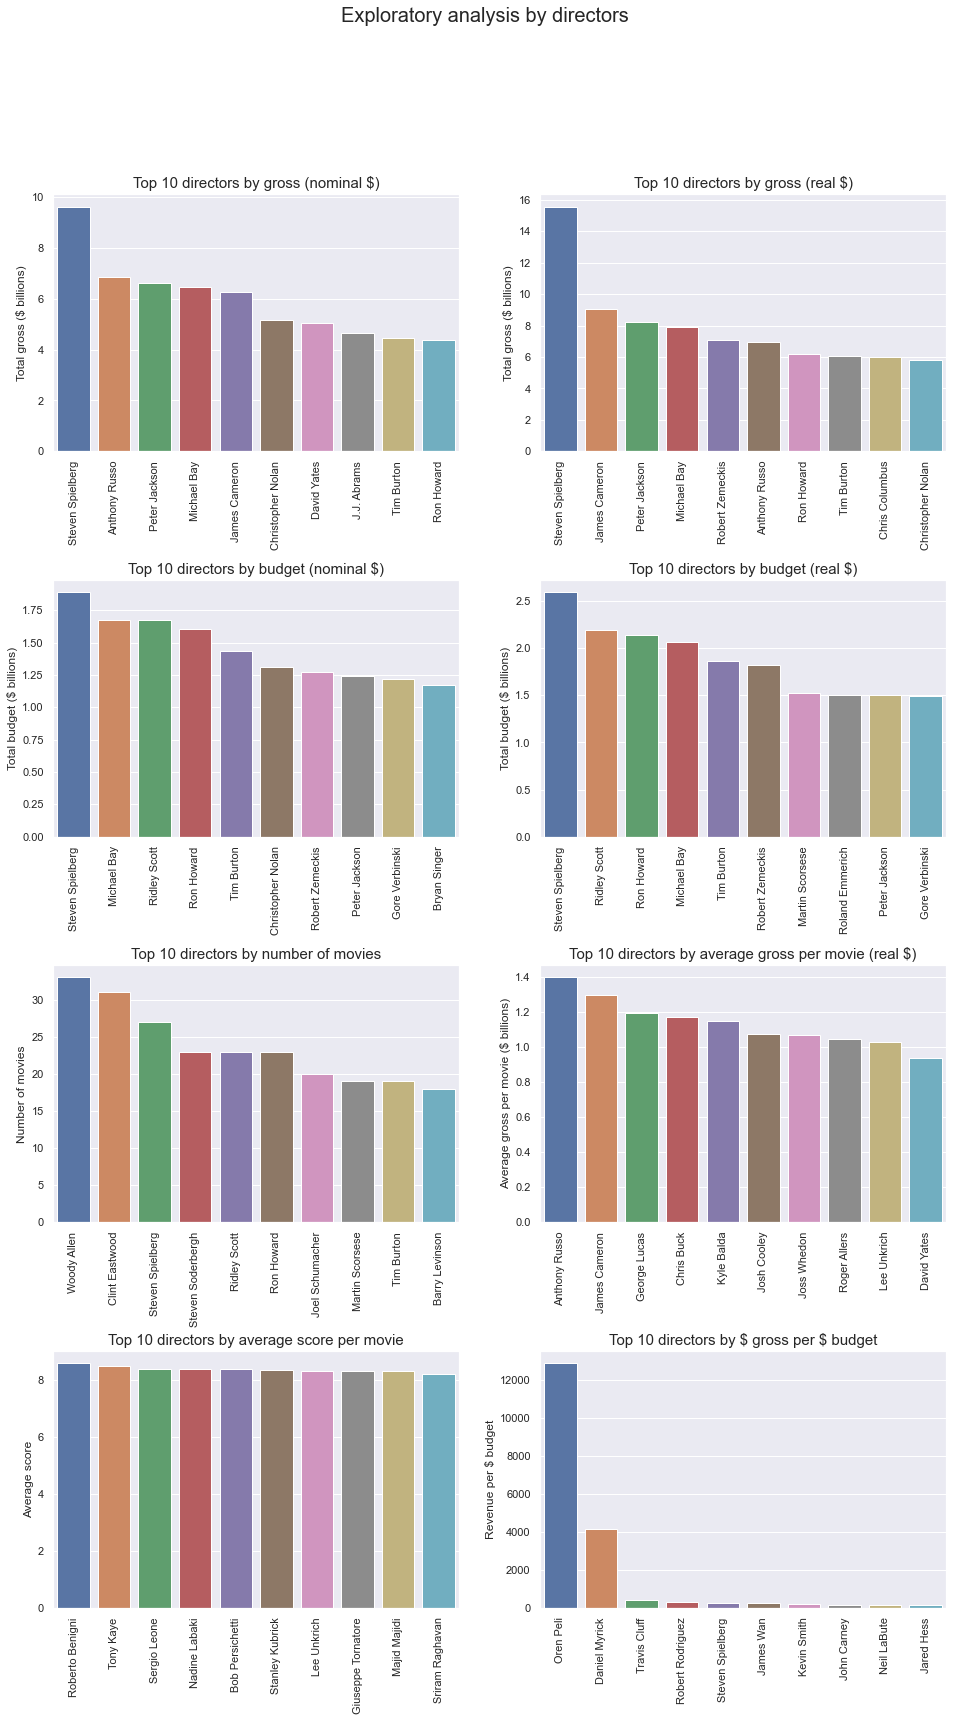

In [174]:
#Exploratory analysis by director

directors_grouper = df.groupby(['director'])
df_directors = directors_grouper.sum()
df_directors['Count'] = directors_grouper.name.count()
df1_directors = df1.groupby(['director']).sum()   #group data excluding NaNs

fig, axes = plt.subplots(4, 2, sharex=False, figsize=(16,26))
plt.subplots_adjust( wspace = 0.2, hspace = 0.5)   #adjust space between plots
fig.suptitle('Exploratory analysis by directors', fontsize=20)

#Top 10 directors by gross
top10_directors_gross = df_directors.sort_values(by='gross', ascending=False).head(10)
sns.barplot(ax=axes[0, 0], x=top10_directors_gross.index, y=top10_directors_gross['gross']/1000000000)
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Total gross ($ billions)')
axes[0, 0].set_title('Top 10 directors by gross (nominal $)', fontsize=15)

#Top 10 directors by gross adjusted
top10_directors_gross = df_directors.sort_values(by='gross_adjusted', ascending=False).head(10)
sns.barplot(ax=axes[0, 1], x=top10_directors_gross.index, y=top10_directors_gross['gross_adjusted']/1000000000)
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Total gross ($ billions)')
axes[0, 1].set_title('Top 10 directors by gross (real $)', fontsize=15)

#Top 10 directors by budget
top10_directors_budget = df_directors.sort_values(by='budget', ascending=False).head(10)
sns.barplot(ax=axes[1, 0], x=top10_directors_budget.index, y=top10_directors_budget['budget']/1000000000)
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Total budget ($ billions)')
axes[1, 0].set_title('Top 10 directors by budget (nominal $)', fontsize=15)

#Top 10 directors by budget adjusted
top10_directors_budget = df_directors.sort_values(by='budget_adjusted', ascending=False).head(10)
sns.barplot(ax=axes[1, 1], x=top10_directors_budget.index, y=top10_directors_budget['budget_adjusted']/1000000000)
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Total budget ($ billions)')
axes[1, 1].set_title('Top 10 directors by budget (real $)', fontsize=15)

#Top 10 directors by number of movies. Excluded all movies with director name of 'Directors'.
top10_directors_count = df['director'].loc[df['director'] != 'Directors'].value_counts().head(10)
sns.barplot(ax=axes[2, 0], x=top10_directors_count.index, y=top10_directors_count)
axes[2, 0].tick_params(axis='x', rotation=90)
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('Number of movies')
axes[2, 0].set_title('Top 10 directors by number of movies', fontsize=15)

#Top 10 directors by revenue per movie
df_directors['rev_per_movie'] = df_directors['gross_adjusted'] / df_directors['Count']
top10_directors_rev_movie = df_directors.sort_values(by='rev_per_movie', ascending=False).head(10)
sns.barplot(ax=axes[2, 1], x=top10_directors_rev_movie.index, y=top10_directors_rev_movie['rev_per_movie']/1000000000)
axes[2, 1].tick_params(axis='x', rotation=90)
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('Average gross per movie ($ billions)')
axes[2, 1].set_title('Top 10 directors by average gross per movie (real $)', fontsize=15)

#Top 10 directors by average score
df_directors['avg_score'] = df_directors['score'] / df_directors['Count']
top10_directors_avg_score = df_directors.sort_values(by='avg_score', ascending=False).head(10)
sns.barplot(ax=axes[3, 0], x=top10_directors_avg_score.index, y=top10_directors_avg_score['avg_score'])
axes[3, 0].tick_params(axis='x', rotation=90)
axes[3, 0].set_xlabel('')
axes[3, 0].set_ylabel('Average score')
axes[3, 0].set_title('Top 10 directors by average score per movie', fontsize=15)

#Top 10 directors by revenue per $ budget
top10_directors_earnings_budget = df1_directors.sort_values(by='earnings_per_$', ascending=False).head(10)
sns.barplot(ax=axes[3, 1], x=top10_directors_earnings_budget.index, y=top10_directors_earnings_budget['earnings_per_$'])
axes[3, 1].tick_params(axis='x', rotation=90)
axes[3, 1].set_xlabel('')
axes[3, 1].set_ylabel('Revenue per $ budget')
axes[3, 1].set_title('Top 10 directors by \$ gross per \$ budget', fontsize=15)

plt.show()

## Exploratory analysis by star


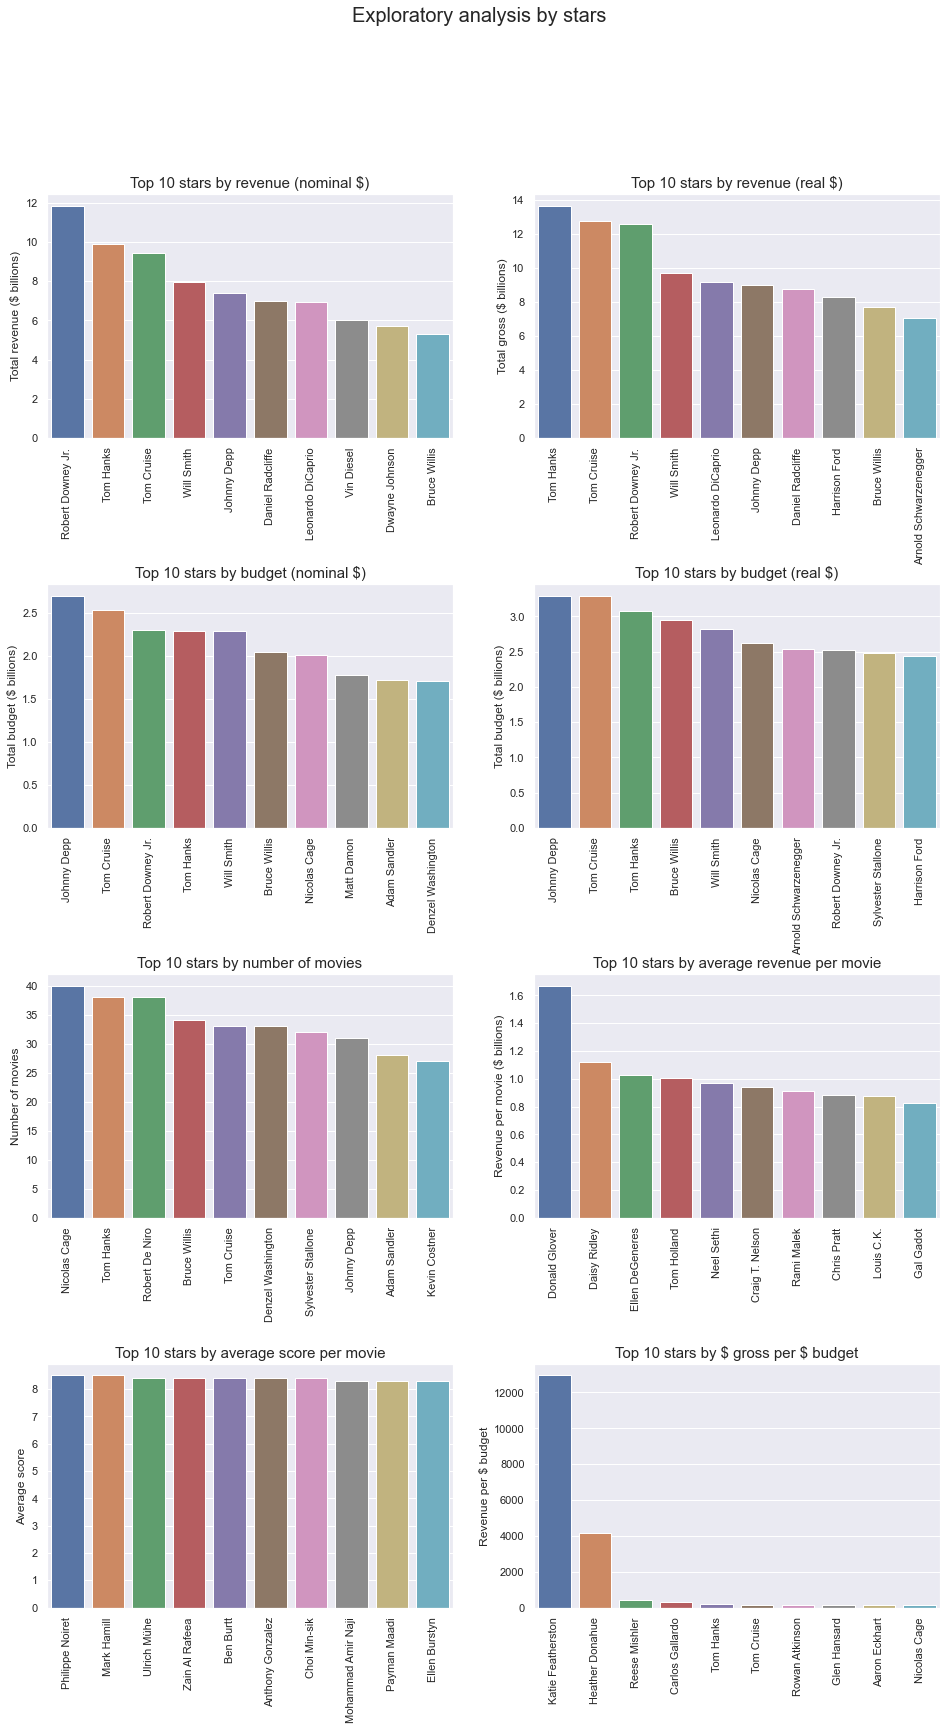

In [173]:
#Exploratory analysis by star

#Group data by star
stars_grouper = df.groupby(['star'])
df_stars = stars_grouper.sum()
df_stars['Count'] = stars_grouper.name.count()
df1_stars = df1.groupby(['star']).sum()   #group data excluding NaNs

#Create plot
fig, axes = plt.subplots(4, 2, sharex=False, figsize=(16,26))
plt.subplots_adjust( wspace = 0.2, hspace = 0.6)   #adjust space between plots
fig.suptitle('Exploratory analysis by stars', fontsize=20)

#Top 10 stars by gross
top10_stars_gross = df_stars.sort_values(by='gross', ascending=False).head(10)
sns.barplot(ax=axes[0, 0], x=top10_stars_gross.index, y=top10_stars_gross['gross']/1000000000)
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Total revenue ($ billions)')
axes[0, 0].set_title('Top 10 stars by revenue (nominal $)', fontsize=15)

#Top 10 stars by gross adjusted
top10_stars_gross = df_stars.sort_values(by='gross_adjusted', ascending=False).head(10)
sns.barplot(ax=axes[0, 1], x=top10_stars_gross.index, y=top10_stars_gross['gross_adjusted']/1000000000)
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Total gross ($ billions)')
axes[0, 1].set_title('Top 10 stars by revenue (real $)', fontsize=15)

#Top 10 stars by budget
top10_stars_budget = df_stars.sort_values(by='budget', ascending=False).head(10)
sns.barplot(ax=axes[1, 0], x=top10_stars_budget.index, y=top10_stars_budget['budget']/1000000000)
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Total budget ($ billions)')
axes[1, 0].set_title('Top 10 stars by budget (nominal $)', fontsize=15)

#Top 10 stars by budget adjusted
top10_stars_budget = df_stars.sort_values(by='budget_adjusted', ascending=False).head(10)
sns.barplot(ax=axes[1, 1], x=top10_stars_budget.index, y=top10_stars_budget['budget_adjusted']/1000000000)
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Total budget ($ billions)')
axes[1, 1].set_title('Top 10 stars by budget (real $)', fontsize=15)

#Top 10 stars by number of movies
top10_stars_count = df_stars.sort_values(by='Count', ascending=False).head(10)
sns.barplot(ax=axes[2, 0], x=top10_stars_count.index, y=top10_stars_count['Count'])
axes[2, 0].tick_params(axis='x', rotation=90)
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('Number of movies')
axes[2, 0].set_title('Top 10 stars by number of movies', fontsize=15)

#Top 10 stars by revenue per movie
df_stars['rev_per_movie'] = df_stars['gross'] / df_stars['Count']
top10_stars_rev_movie = df_stars.sort_values(by='rev_per_movie', ascending=False).head(10)
sns.barplot(ax=axes[2, 1], x=top10_stars_rev_movie.index, y=top10_stars_rev_movie['rev_per_movie']/1000000000)
axes[2, 1].tick_params(axis='x', rotation=90)
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('Revenue per movie ($ billions)')
axes[2, 1].set_title('Top 10 stars by average revenue per movie', fontsize=15)

#Top 10 stars by average score
df_stars['avg_score'] = df_stars['score'] / df_stars['Count']
top10_stars_avg_score = df_stars.sort_values(by='avg_score', ascending=False).head(10)
sns.barplot(ax=axes[3, 0], x=top10_stars_avg_score.index, y=top10_stars_avg_score['avg_score'])
axes[3, 0].tick_params(axis='x', rotation=90)
axes[3, 0].set_xlabel('')
axes[3, 0].set_ylabel('Average score')
axes[3, 0].set_title('Top 10 stars by average score per movie', fontsize=15)

#Top 10 directors by revenue per $ spent
top10_stars_earnings_budget = df1_stars.sort_values(by='earnings_per_$', ascending=False).head(10)
sns.barplot(ax=axes[3, 1], x=top10_stars_earnings_budget.index, y=top10_stars_earnings_budget['earnings_per_$'])
axes[3, 1].tick_params(axis='x', rotation=90)
axes[3, 1].set_xlabel('')
axes[3, 1].set_ylabel('Revenue per $ budget')
axes[3, 1].set_title('Top 10 stars by \$ gross per \$ budget', fontsize=15)

plt.show()

## Exploratory analysis by movie

The following graphs show the top 10 movies by:

\* revenue

\* budget

\* revenue per \\$ of budget

\* score

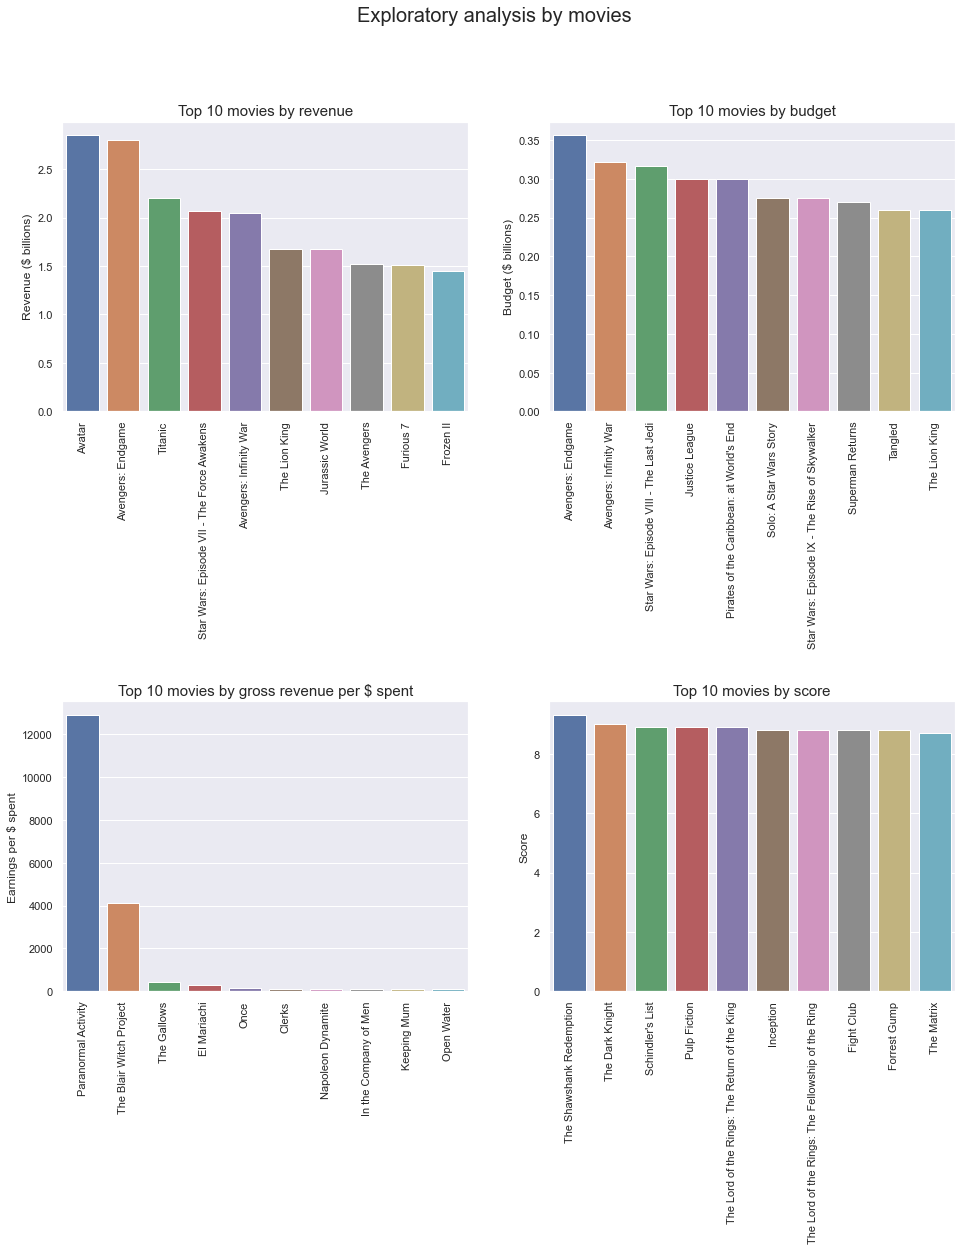

In [23]:
#Exploratory analysis by movie

#Create plot
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16,16))
plt.subplots_adjust( wspace = 0.2, hspace = 1)   #adjust space between plots
fig.suptitle('Exploratory analysis by movies', fontsize=20)

#Top 10 movies by revenue
top10_revenue = df.sort_values(by='gross', ascending=False).head(10)
sns.barplot(ax=axes[0, 0], x=top10_revenue['name'], y=top10_revenue['gross']/1000000000)
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Revenue ($ billions)')
axes[0, 0].set_title('Top 10 movies by revenue', fontsize=15)

#Top 10 movies by budget
top10_budget = df.sort_values(by='budget', ascending=False).head(10)
sns.barplot(ax=axes[0, 1], x=top10_budget['name'], y=top10_budget['budget']/1000000000)
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Budget ($ billions)')
axes[0, 1].set_title('Top 10 movies by budget', fontsize=15)

#Top 10 movies by earnings per $ spent
top10_earnings_budget = df1.sort_values(by='earnings_per_$', ascending=False).head(10)
sns.barplot(ax=axes[1, 0], x=top10_earnings_budget['name'], y=top10_earnings_budget['earnings_per_$'])
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Earnings per $ spent')
axes[1, 0].set_title('Top 10 movies by gross revenue per $ spent', fontsize=15)

#Top 10 movies by score
top10_earnings_score = df.sort_values(by='score', ascending=False).head(10)
sns.barplot(ax=axes[1, 1], x=top10_earnings_score['name'], y=top10_earnings_score['score'])
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Top 10 movies by score', fontsize=15)

plt.show()

In [ ]:
## Exploratory analysis by genre

The genres with the largest numbers of movies are Comedy (2230), Action (1695) and Drama (1476).

The count of movies by genre below shows that a number of genres have very few movies. For the exploratory analysis
by genre I will focus on the largest 8 genres (all genres with over 300 movies).

The genre with the highest average score is Biography.

The genre with the largest gross revenue is Action, whereas the genre with the largest average gross revenue per movie 
is Animation.

In [77]:
#Count number of movies per genre
genre_count = df.groupby(['genre']).name.count()
print(genre_count)

genre
Action       1695
Adventure     426
Animation     334
Biography     439
Comedy       2230
Crime         544
Drama        1476
Family         10
Fantasy        43
Horror        318
Music           1
Musical         1
Mystery        20
Romance         8
Sci-Fi          9
Sport           1
Thriller       16
Western         3
Name: name, dtype: int64


In [63]:
#Filter top 8 genres
genre_list = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror']

df_genre = df[df['genre'].isin(genre_list)].sort_values('genre')
df1_genre = df1[df1['genre'].isin(genre_list)].sort_values('genre')

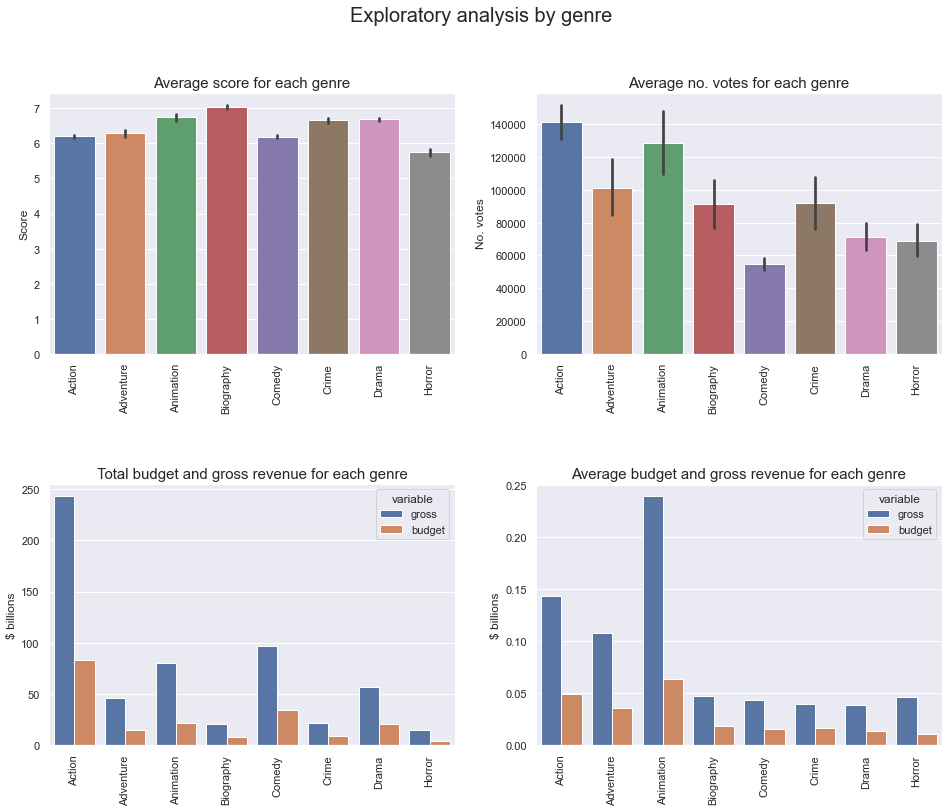

In [95]:
#Exploratory analysis by genre

#Group by genre
genre_grouper = df_genre.groupby(['genre'])
group_genre = genre_grouper.sum()
group_genre = group_genre[['gross', 'budget']]
group_genre.reset_index(level=0, inplace=True)
group_genre = pd.melt(group_genre, id_vars = 'genre')
group_genre2 = pd.merge(group_genre, genre_count, on='genre')
group_genre2.rename(columns = {'name': 'count'}, inplace=True)

#Create plot
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16,12))
plt.subplots_adjust( wspace = 0.2, hspace = 0.5)   #adjust space between plots
fig.suptitle('Exploratory analysis by genre', fontsize=20)

#Score for genres
sns.barplot(ax=axes[0, 0], x=df_genre['genre'], y=df_genre['score'])
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Average score for each genre', fontsize=15)

#Votes for genres
sns.barplot(ax=axes[0, 1], x=df_genre['genre'], y=df_genre['votes'])
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('No. votes')
axes[0, 1].set_title('Average no. votes for each genre', fontsize=15)

#Total gross and budget by genre
sns.barplot(ax=axes[1, 0], x=group_genre2['genre'], y=group_genre2['value']/1000000000, hue=group_genre2['variable'])
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('$ billions')
axes[1, 0].set_title('Total budget and gross revenue for each genre', fontsize=15)

#Average gross and budget by genre
sns.barplot(ax=axes[1, 1], x=group_genre2['genre'], y=(group_genre2['value']/group_genre2['count'])/1000000000, hue=group_genre2['variable'])
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('$ billions')
axes[1, 1].set_title('Average budget and gross revenue for each genre', fontsize=15)


#Avg gross by genre
#sns.barplot(ax=axes[2, 0], x=df_genre['genre'], y=df_genre['gross']/1000000000)
#axes[2, 0].tick_params(axis='x', rotation=90)
#axes[2, 0].set_xlabel('')
#axes[2, 0].set_ylabel('Gross ($ billions)')
#axes[2, 0].set_title('Average gross revenue for each genre', fontsize=15)

#Avg budget by genre
#sns.barplot(ax=axes[2, 1], x=df_genre['genre'], y=df_genre['budget']/1000000000)
#axes[2, 1].tick_params(axis='x', rotation=90)
#axes[2, 1].set_xlabel('')
#axes[2, 1].set_ylabel('Budget ($ billions)')
#axes[2, 1].set_title('Average budget for each genre', fontsize=15)

plt.show()

## Exploratory analysis by rating

The ratings with the largest numbers of movies are R, PG-13 and PG. 

The count of movies by rating below shows that a number of ratings have very few movies. For the exploratory analysis
by genre I will focus on the largest 5 ratings (all ratings with over 100 movies).

ANALYSIS

In [97]:
#Count number of movies per rating
rating_count = df.groupby(['rating']).name.count()
print(rating_count)

rating
Approved        1
G             153
NC-17          23
Not Rated     282
PG           1249
PG-13        2110
R            3689
TV-14           1
TV-MA           9
TV-PG           4
Unrated        50
X               3
Name: name, dtype: int64


In [106]:
#Filter top 5 ratings
rating_list = ['G', 'Not Rated', 'PG', 'PG-13', 'R']

df_rating = df[df['rating'].isin(rating_list)].sort_values('rating')
df1_rating = df1[df1['rating'].isin(rating_list)].sort_values('rating')

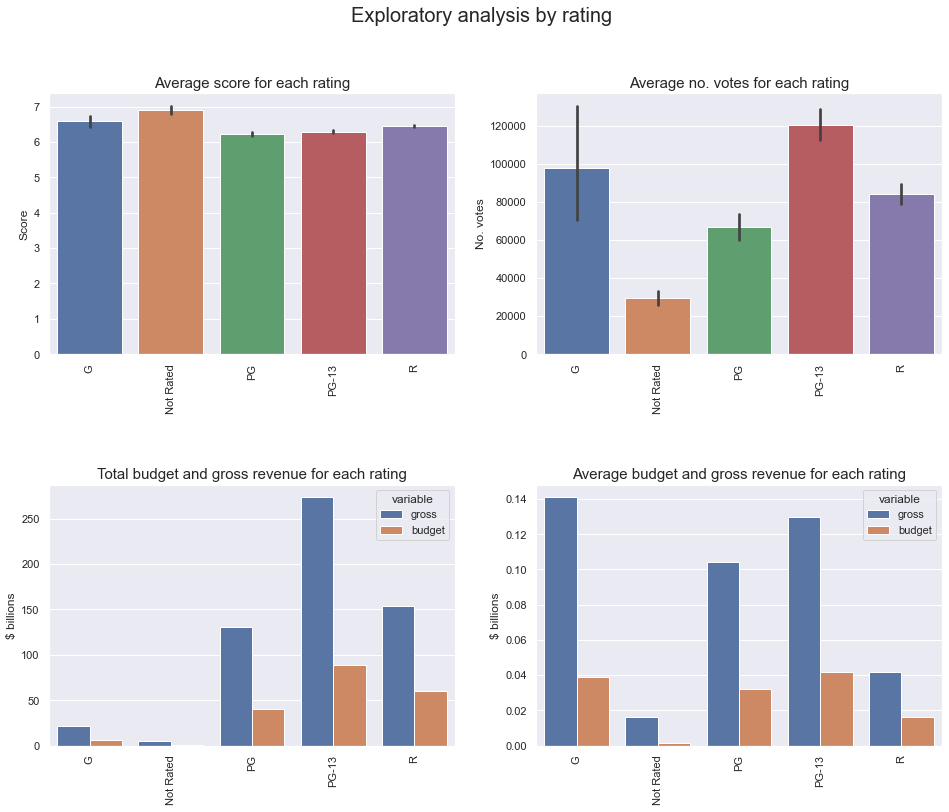

In [105]:
#Exploratory analysis by rating

#Group by rating
rating_grouper = df_rating.groupby(['rating'])
group_rating = rating_grouper.sum()
group_rating = group_rating[['gross', 'budget']]
group_rating.reset_index(level=0, inplace=True)
group_rating = pd.melt(group_rating, id_vars = 'rating')
group_rating2 = pd.merge(group_rating, rating_count, on='rating')
group_rating2.rename(columns = {'name': 'count'}, inplace=True)

#Create plot
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16,12))
plt.subplots_adjust( wspace = 0.2, hspace = 0.5)   #adjust space between plots
fig.suptitle('Exploratory analysis by rating', fontsize=20)

#Score for genres
sns.barplot(ax=axes[0, 0], x=df_rating['rating'], y=df_rating['score'])
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Average score for each rating', fontsize=15)

#Votes for genres
sns.barplot(ax=axes[0, 1], x=df_rating['rating'], y=df_rating['votes'])
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('No. votes')
axes[0, 1].set_title('Average no. votes for each rating', fontsize=15)

#Total gross and budget by rating
sns.barplot(ax=axes[1, 0], x=group_rating2['rating'], y=group_rating2['value']/1000000000, hue=group_rating2['variable'])
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('$ billions')
axes[1, 0].set_title('Total budget and gross revenue for each rating', fontsize=15)

#Average gross and budget by rating
sns.barplot(ax=axes[1, 1], x=group_rating2['rating'], y=(group_rating2['value']/group_rating2['count'])/1000000000, hue=group_genre2['variable'])
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('$ billions')
axes[1, 1].set_title('Average budget and gross revenue for each rating', fontsize=15)


plt.show()

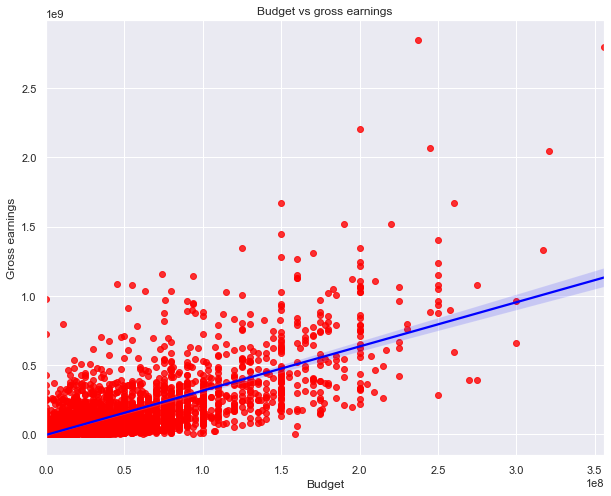

In [678]:
#Linear regression budget vs gross

plt.figure(figsize=(10,8))
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})
plt.title('Budget vs gross earnings')
plt.ylabel('Gross earnings')
plt.xlabel('Budget')
plt.show()

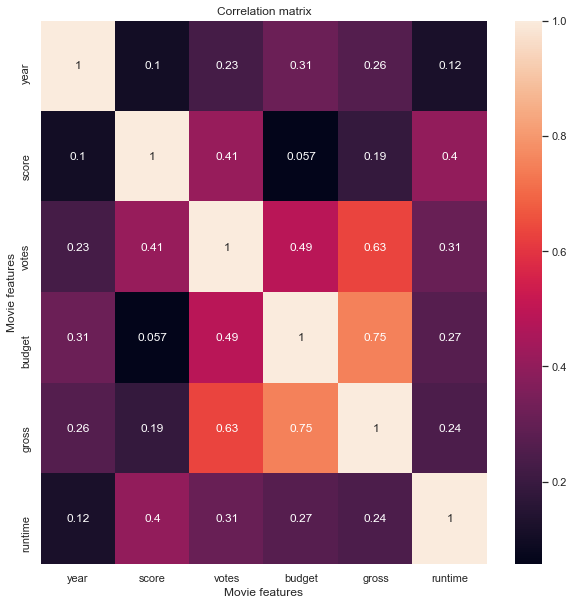

In [564]:
#Correlation matrix heatmap (Pearson correlation)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

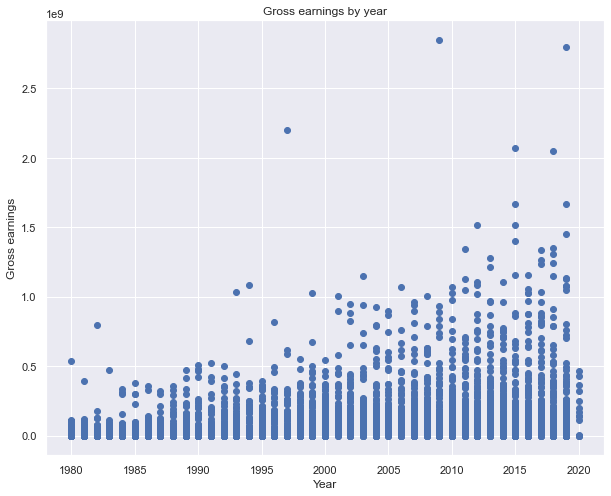

In [486]:
#scatter plot year vs gross

plt.figure(figsize=(10,8))
plt.scatter(x = df['year'], y = df['gross'])
plt.title('Gross earnings by year')
plt.ylabel('Gross earnings')
plt.xlabel('Year')
plt.show()

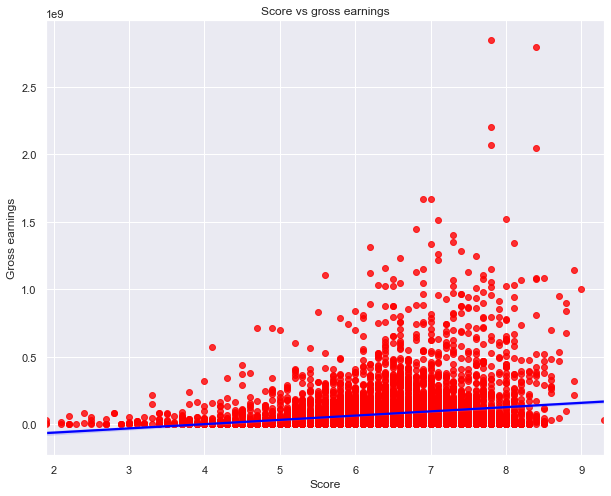

In [352]:
#scatter plot score vs gross

plt.figure(figsize=(10,8))
sns.regplot(x = 'score', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})
plt.title('Score vs gross earnings')
plt.ylabel('Gross earnings')
plt.xlabel('Score')
plt.show()

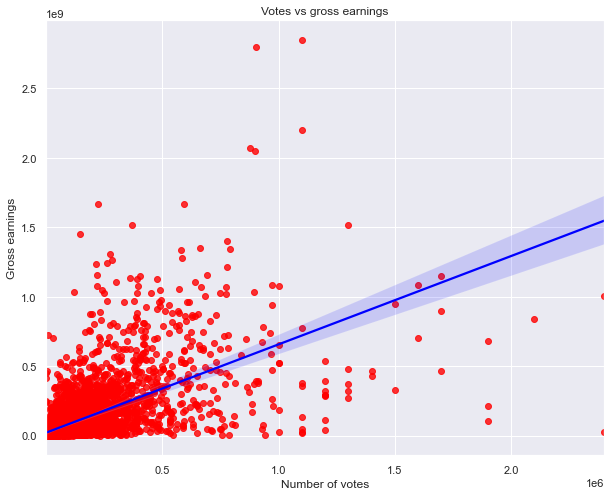

In [353]:
#scatter plot votes vs gross

plt.figure(figsize=(10,8))
sns.regplot(x = 'votes', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})
plt.title('Votes vs gross earnings')
plt.ylabel('Gross earnings')
plt.xlabel('Number of votes')
plt.show()

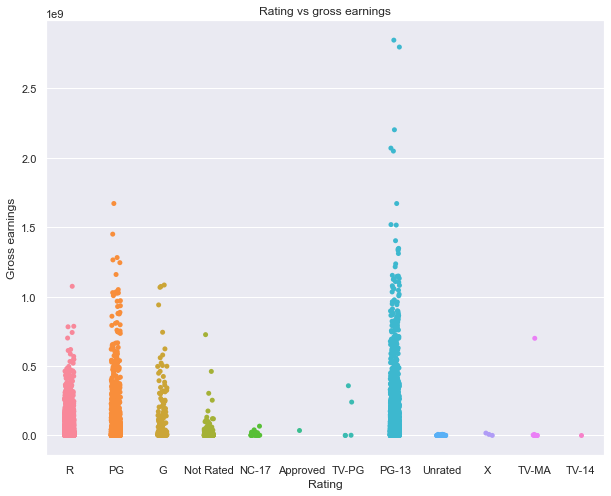

In [354]:
#scatter plot rating vs gross

plt.figure(figsize=(10,8))
sns.stripplot(x="rating", y="gross", data = df)
plt.title('Rating vs gross earnings')
plt.ylabel('Gross earnings')
plt.xlabel('Rating')
plt.show()

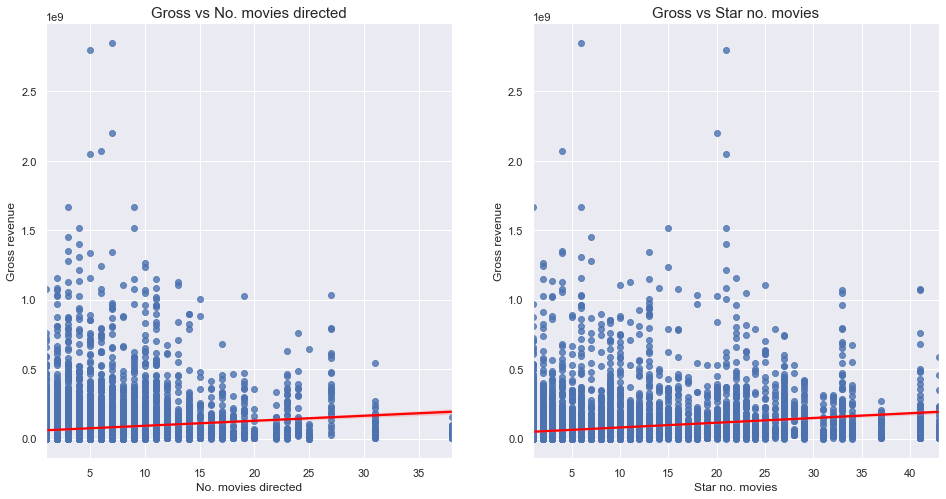

In [582]:
#Plot linear regression number of movies the director/star has made vs revenue (per movie)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))

sns.regplot(ax=axes[0], x = 'dir_count', y = 'gross', data = df, line_kws = {'color':'red'})
axes[0].set_title('Gross vs No. movies directed', fontsize=15)
axes[0].set_ylabel('Gross revenue')
axes[0].set_xlabel('No. movies directed')

sns.regplot(ax=axes[1], x = 'star_count', y = 'gross', data = df, line_kws = {'color':'red'})
axes[1].set_title('Gross vs Star no. movies', fontsize=15)
axes[1].set_ylabel('Gross revenue')
axes[1].set_xlabel('Star no. movies')

plt.show()

In [ ]:
correlation_matrix = df_dir_count.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Ron Howard',
       'Ridley Scott', 'Steven Soderbergh', 'Joel Schumacher',
       'Barry Levinson', 'Tim Burton', 'Martin Scorsese'],
      dtype='object')